In [1]:
import warnings
import os
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(304431, 17)


In [3]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city'
]

In [4]:
X = df[used_features]
y = df['final_price']


In [5]:
cities = [
    "תל אביב יפו",
    "חיפה",
    "באר שבע",
    "ירושלים",
    "פתח תקווה",
    "אשדוד",
    "אשקלון",
    "נתניה",
    "ראשון לציון",
    "חולון",
    "רמת גן",
    "בת ים",
    "רחובות",
    "חדרה",
    "נהריה",
    "אילת",
    "קרית אתא",
    "עפולה",
    "בני ברק",
    "לוד"
]

test_size = 0.3

cities = {city: {"processor": None, "algo": None} for city in cities}


תל אביב יפו
(23201, 17)
(23201, 1035)


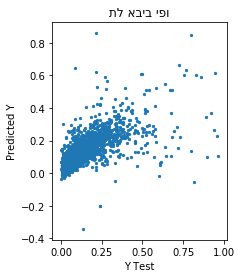

Mean squared error: 0.00
Mean squared error sqrt: 0.0577599882537749
Variance score: 0.53
חיפה
(21320, 17)
(21320, 754)


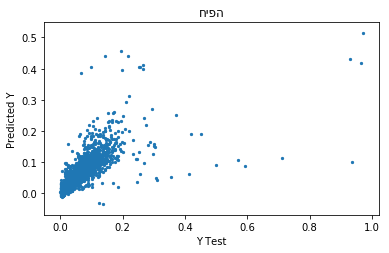

Mean squared error: 0.00
Mean squared error sqrt: 0.02919458741903167
Variance score: 0.57
באר שבע
(18557, 17)
(18557, 657)


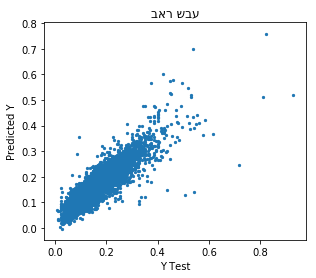

Mean squared error: 0.00
Mean squared error sqrt: 0.03915390267721242
Variance score: 0.78
ירושלים
(21330, 17)
(21330, 908)


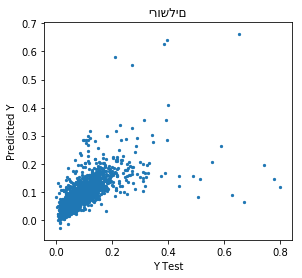

Mean squared error: 0.00
Mean squared error sqrt: 0.03129296394390146
Variance score: 0.53
פתח תקווה
(14260, 17)
(14260, 626)


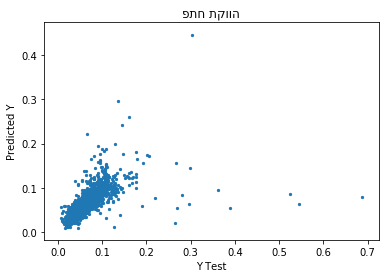

Mean squared error: 0.00
Mean squared error sqrt: 0.021823307744445297
Variance score: 0.45
אשדוד
(13580, 17)
(13580, 545)


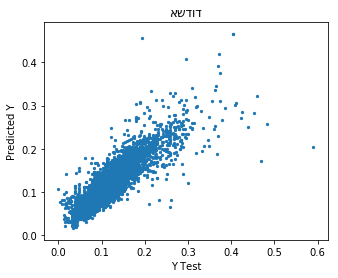

Mean squared error: 0.00
Mean squared error sqrt: 0.02936969680161182
Variance score: 0.74
אשקלון
(12646, 17)
(12646, 531)


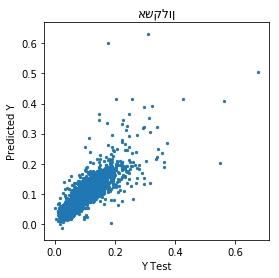

Mean squared error: 0.00
Mean squared error sqrt: 0.02866146759113433
Variance score: 0.67
נתניה
(12932, 17)
(12932, 577)


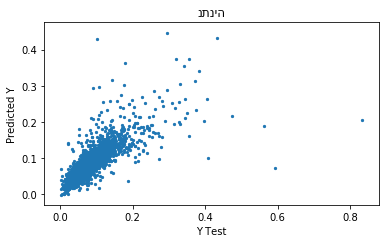

Mean squared error: 0.00
Mean squared error sqrt: 0.02868807113062144
Variance score: 0.64
ראשון לציון
(11998, 17)
(11998, 670)


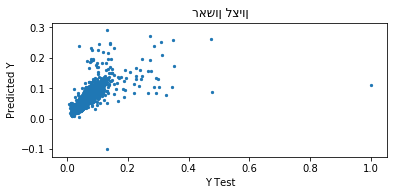

Mean squared error: 0.00
Mean squared error sqrt: 0.025619477089479505
Variance score: 0.49
חולון
(9876, 17)
(9876, 506)


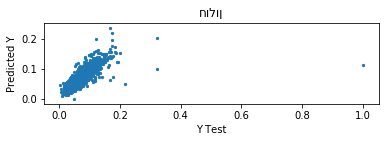

Mean squared error: 0.00
Mean squared error sqrt: 0.021617700719387206
Variance score: 0.58
רמת גן
(9055, 17)
(9055, 528)


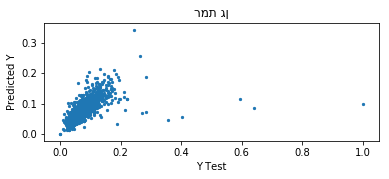

Mean squared error: 0.00
Mean squared error sqrt: 0.030065507230151643
Variance score: 0.38
בת ים
(8441, 17)
(8441, 407)


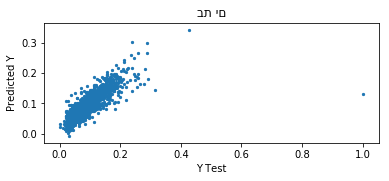

Mean squared error: 0.00
Mean squared error sqrt: 0.02619656285001605
Variance score: 0.67
רחובות
(7511, 17)
(7511, 496)


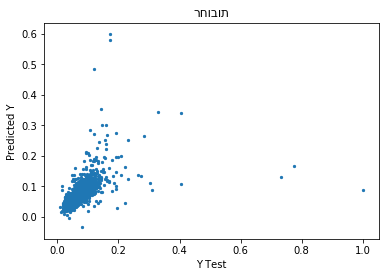

Mean squared error: 0.00
Mean squared error sqrt: 0.03849059575275006
Variance score: 0.16
חדרה
(6446, 17)
(6446, 469)


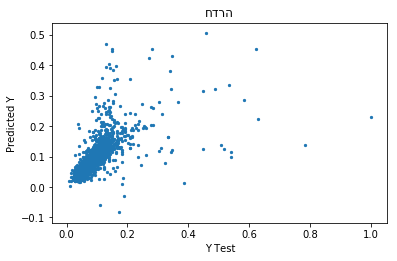

Mean squared error: 0.00
Mean squared error sqrt: 0.05253249189456771
Variance score: 0.27
נהריה
(5346, 17)
(5346, 363)


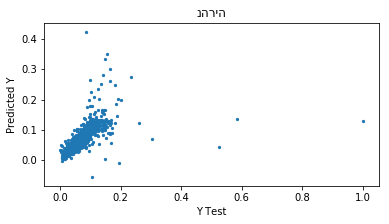

Mean squared error: 0.00
Mean squared error sqrt: 0.03596615388685076
Variance score: 0.33
אילת
(5185, 17)
(5185, 406)


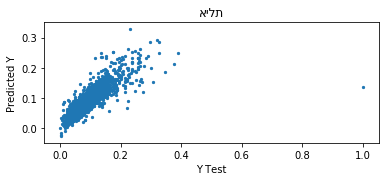

Mean squared error: 0.00
Mean squared error sqrt: 0.03503751629576558
Variance score: 0.65
קרית אתא
(4528, 17)
(4528, 409)


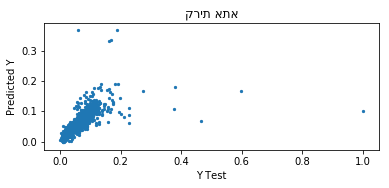

Mean squared error: 0.00
Mean squared error sqrt: 0.037526734079547715
Variance score: 0.42
עפולה
(4208, 17)
(4208, 396)


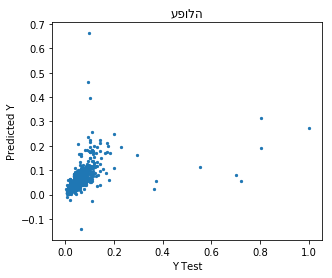

Mean squared error: 0.00
Mean squared error sqrt: 0.05333156269267299
Variance score: 0.17
בני ברק
(3405, 17)
(3405, 328)


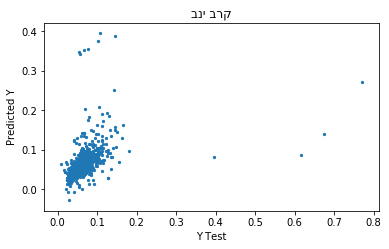

Mean squared error: 0.00
Mean squared error sqrt: 0.043212821039663105
Variance score: -0.02
לוד
(3223, 17)
(3223, 327)


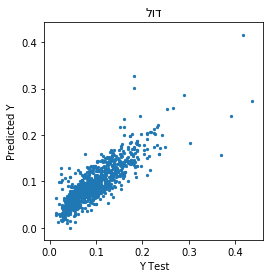

Mean squared error: 0.00
Mean squared error sqrt: 0.027560358168295124
Variance score: 0.70


In [6]:

for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)
    print(X.shape)
    
    # TODO: don't use, it takes too much time to estimate
    # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
    # X = poly.fit_transform(X)
    # print(datetime.now())
    # print(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(city)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

תל אביב יפו
(23201, 8)
(23201, 1035)
0.5492139874435168


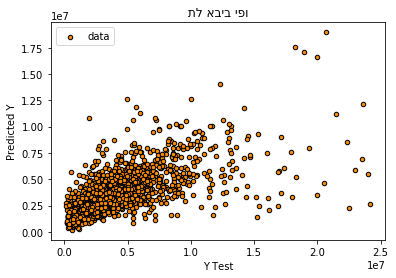

חיפה
(21320, 8)
(21320, 754)
0.6557435874246264


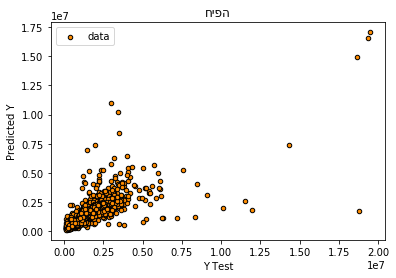

באר שבע
(18557, 8)
(18557, 657)
0.7745473709634884


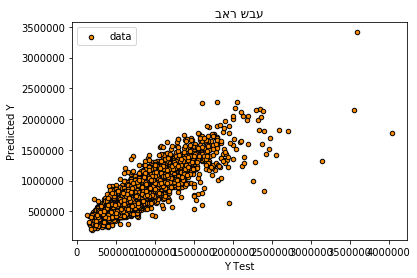

ירושלים
(21330, 8)
(21330, 908)
0.47483793189118007


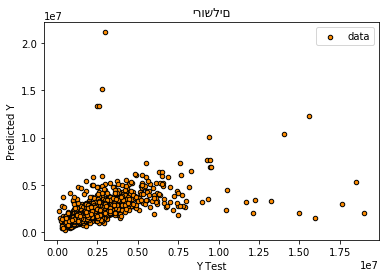

פתח תקווה
(14260, 8)
(14260, 626)
0.4699884990175134


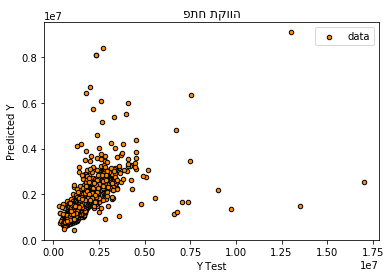

אשדוד
(13580, 8)
(13580, 545)
0.7498572660984465


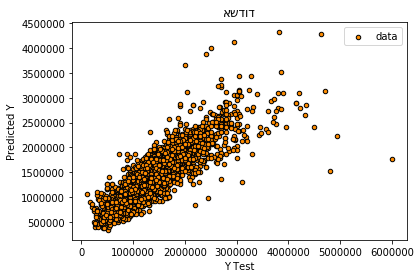

אשקלון
(12646, 8)
(12646, 531)
0.6952870941038367


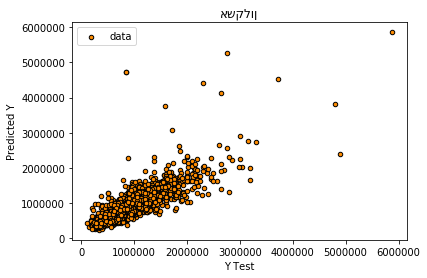

נתניה
(12932, 8)
(12932, 577)
0.6878629348310681


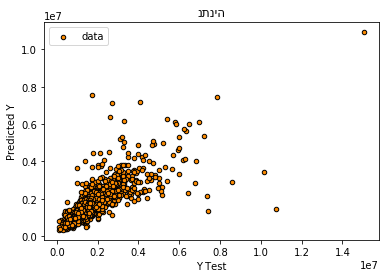

ראשון לציון
(11998, 8)
(11998, 670)
0.5099289199761624


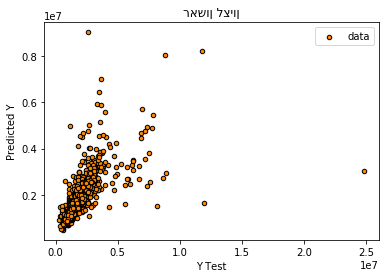

חולון
(9876, 8)
(9876, 506)
0.581549871356531


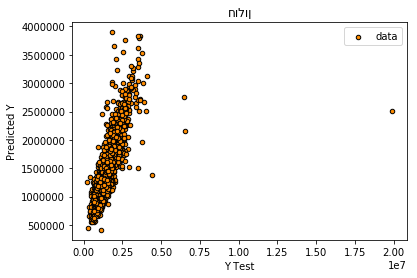

רמת גן
(9055, 8)
(9055, 528)
0.3138267508083423


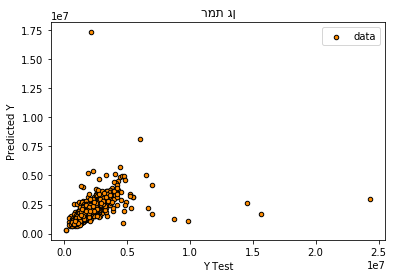

בת ים
(8441, 8)
(8441, 407)
0.6788463528151532


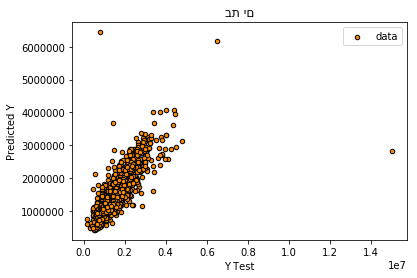

רחובות
(7511, 8)
(7511, 496)
0.28763562657729513


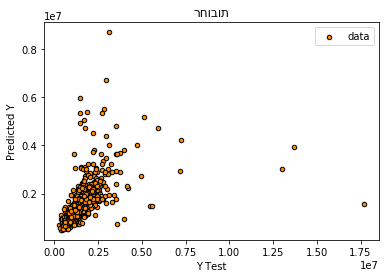

חדרה
(6446, 8)
(6446, 469)
0.3774657577656123


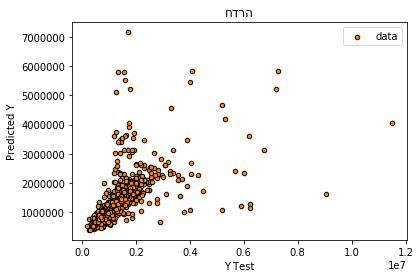

נהריה
(5346, 8)
(5346, 363)
0.25233780687727647


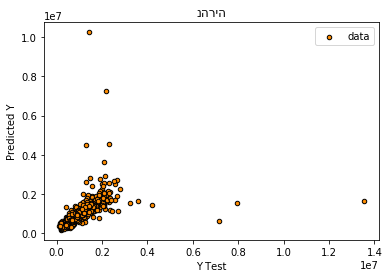

אילת
(5185, 8)
(5185, 406)
0.7110962724918274


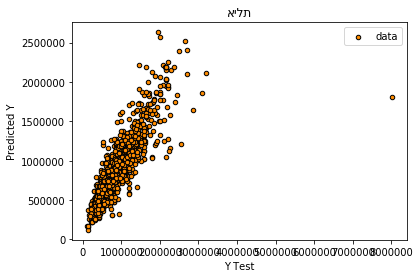

קרית אתא
(4528, 8)
(4528, 409)
0.46551848428622133


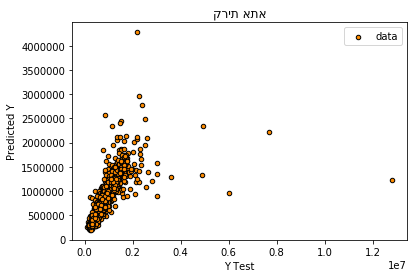

עפולה
(4208, 8)
(4208, 396)
0.3562816722208051


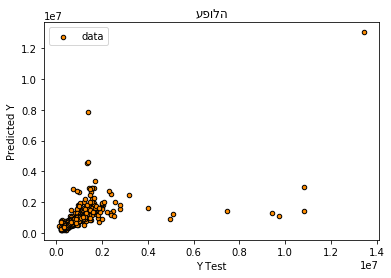

בני ברק
(3405, 8)
(3405, 328)
0.2871624877366673


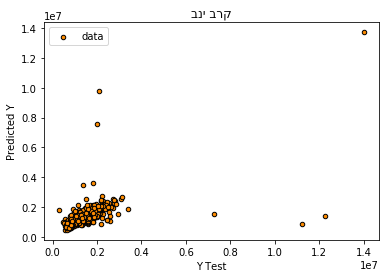

לוד
(3223, 8)
(3223, 327)
0.6141602254055227


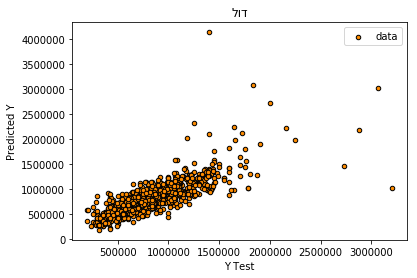

In [7]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    X = _df[used_features]
    y = _df['final_price']
    print(X.shape)

    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    cities[city]["processor"] = ohe
    print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)
#     continue
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    clf.fit(X_train, y_train)
    cities[city]["algo"] = clf
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))
    
    # Plot the results
    plt.figure()
    plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="data")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(city)
    plt.legend()
    plt.show()


In [8]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4, 4, 4, 4, 4], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': ["2015-01-01", "2019-01-01", "2010-01-01", "2016-01-01", "2019-01-01"],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות             4      2  2015-01-01   
1     יצחק רגר     שכונה ב'  דירת בבית קומות             4     10  2019-01-01   
2    משה פריבס    רמות הרכס  דירת בבית קומות             4      2  2010-01-01   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות             4      2  2016-01-01   
4       התקווה   מרכז אזרחי  דירת בבית קומות             4      2  2019-01-01   

   building_mr     city  
0          115  באר שבע  
1          116  באר שבע  
2          120  באר שבע  
3          120  באר שבע  
4          113  באר שבע  
[1257505.2662703113, 1035139.2676589289, 1077608.8685443155, 1262454.7575395708, 1337047.1680760572]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    y, info = pd.qcut(np.array(y), 10, retbins=True)
    print(info)
    y = pd.DataFrame(y.codes)
    
    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

    rfc = RandomForestClassifier(n_estimators=150)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))


תל אביב יפו
(23201, 17)
[  100800.  1036000.  1350000.  1650000.  1925000.  2235000.  2550000.
  2900000.  3450000.  4430000. 24999999.]
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       695
           1       0.43      0.42      0.43       693
           2       0.33      0.35      0.34       659
           3       0.38      0.36      0.37       666
           4       0.31      0.28      0.30       708
           5       0.32      0.32      0.32       691
           6       0.31      0.30      0.30       718
           7       0.36      0.33      0.35       724
           8       0.37      0.38      0.38       698
           9       0.61      0.68      0.64       709

   micro avg       0.40      0.40      0.40      6961
   macro avg       0.40      0.40      0.40      6961
weighted avg       0.40      0.40      0.40      6961

[[432 131  65  19  14   3   5   8  11   7]
 [171 294 126  41  27   9   8   6   6   5]
 [ 60 142 229  96 

In [ ]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

In [ ]:
# to load:
cities = {city: {
    "processor": joblib.load(os.path.join("pickles", city, "processor.joblib")), 
    "algo": joblib.load(os.path.join("pickles", city, "algo.joblib"))
} for city in cities}